# Homework-2: Softmax for MNIST Classification

### In this homework, you need to
- ### implement and apply a softmax classifier to perform digits classification.

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load MNIST Dataset
The **mnist_data_loader.py** is a script to load mnist dataset, which is included in [TensorFlow tutorial](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py).

In [21]:
import mnist_data_loader

mnist_dataset = mnist_data_loader.read_data_sets("../MNIST_data/", one_hot=True)

# training dataset
train_set = mnist_dataset.train 
# test dataset
test_set = mnist_dataset.test   

train_size = train_set.num_examples
test_size = test_set.num_examples
print()
print('Training dataset size: ', train_size)
print('Test dataset size: ', test_size)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz

Training dataset size:  60000
Test dataset size:  10000


## Data Example
To have a better understand of MNIST dataset, we can visualize some examples in MNIST.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


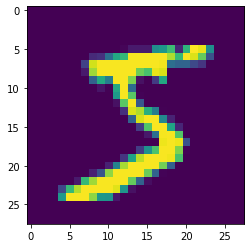

In [3]:
# You can choose any image in training set to visualize, example_id ∈ [0,60000)
example_id = 0 

image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 10
#print(image)
print(label)
plt.imshow(np.reshape(image,[28,28]))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [4]:
batch_size = 100
max_epoch = 10
learning_rate = 0.01

# For regularization
lamda = 0

### TODO
Before executing the following code, you should accomplish **./softmax_classifier.py**.

In [5]:
from softmax_classifier import softmax_classifier

## Train

In [6]:
def test_acc():
    correct = 0
    iter_per_batch = test_size // batch_size

    # Test process
    for batch_id in range(0, iter_per_batch):
        batch = test_set.next_batch(batch_size)
        data, label = batch
        
        # We only need prediction results in testing
        _,_, prediction = softmax_classifier(W, data , label, lamda)
        label = np.argmax(label, axis=1)
        
        correct += sum(prediction.reshape(batch_size) == label)
        
    accuracy = correct * 1.0 / test_size
    return accuracy

In [7]:
loss_sets=[]
accu_sets=[]
test_accs=[]

In [9]:
for lamda in np.arange(0,0.15,0.1):
    # Weight Initialization
    W = np.random.randn(28*28, 10) * 0.001

    loss_set = []
    accu_set = []
    test_acc_set=[]
    disp_freq = 100

    # Training process
    for epoch in range(0, max_epoch):
        iter_per_batch = train_size // batch_size
        for batch_id in range(0, iter_per_batch):
            batch = train_set.next_batch(batch_size) # get data of next batch
            input, label = batch
            
            # softmax_classifier
            loss, gradient, prediction = softmax_classifier(W, input , label, lamda)
            
            # Calculate accuracy
            label = np.argmax(label, axis=1) # scalar representation
            accuracy = sum(prediction.reshape(100) == label) / float(len(label))
            
            loss_set.append(loss)
            accu_set.append(accuracy)
            
            # Update weights
            W = W - (learning_rate * gradient)
            if batch_id % disp_freq == 0:
                test_acc_set.append(test_acc())
            #     pass
            #     print("Epoch [{}][{}]\t Batch [{}][{}]\t Training Loss {:.4f}\t Accuracy {:.4f}".format(
            #         epoch, max_epoch, batch_id, iter_per_batch, 
            #         loss[0], accuracy))
        # print()
    loss_sets.append(loss_set)
    accu_sets.append(accu_set)
    test_accs.append(test_acc_set)
    abbr='la_'+str(lamda)+'_lr_'+str(learning_rate)+'_acc_'+str(accuracy)+'_epo_'+str(max_epoch)+'_bat_'+str(batch_size)
    print(abbr)
    test_acc()











la_0.0_lr_0.01_acc_0.93_epo_10_bat_100










la_0.1_lr_0.01_acc_0.83_epo_10_bat_100


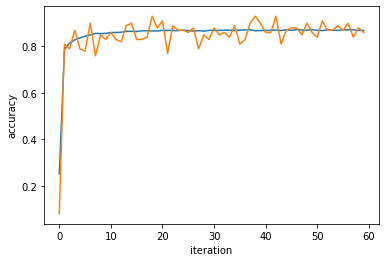

In [24]:
plt.plot(test_acc_set)
plt.plot(accu_set[::100])
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()

Text(0, 0.5, 'loss')

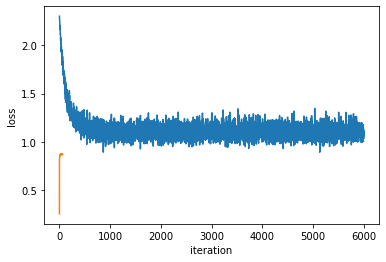

In [16]:
plt.plot(loss_set)
plt.plot(test_acc_set)
plt.plot()
plt.xlabel('iteration')
plt.ylabel('loss')
# plt.legend(np.round(np.arange(0,0.5,0.1),2))

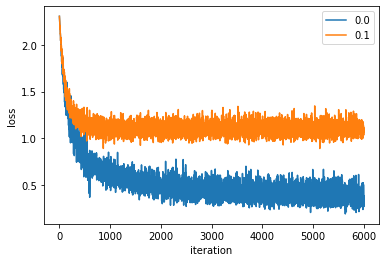

In [10]:
for loss_plot in loss_sets:
    plt.plot(loss_plot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(np.round(np.arange(0,0.5,0.1),2))

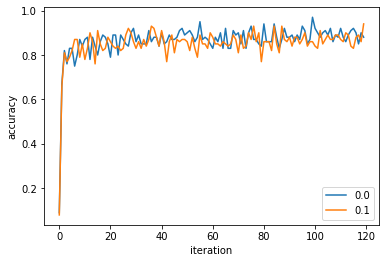

In [11]:
for accu_plot in accu_sets:
    plt.plot(accu_plot[::50])
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend(np.round(np.arange(0,0.5,0.1),2))

## Test

In [12]:
def test_acc():
    correct = 0
    iter_per_batch = test_size // batch_size

    # Test process
    for batch_id in range(0, iter_per_batch):
        batch = test_set.next_batch(batch_size)
        data, label = batch
        
        # We only need prediction results in testing
        _,_, prediction = softmax_classifier(W, data , label, lamda)
        label = np.argmax(label, axis=1)
        
        correct += sum(prediction.reshape(batch_size) == label)
        
    accuracy = correct * 1.0 / test_size
    print('Test Accuracy: ', accuracy)

In [13]:
test_acc()

Test Accuracy:  0.8682


## Plot

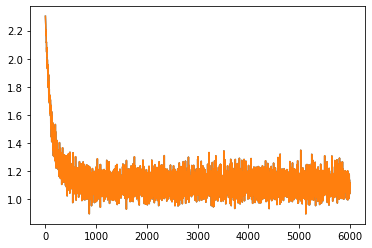

In [14]:
loss_sets=[]
loss_sets.append(loss_set)
loss_sets.append(loss_set)
plt.plot(loss_set)
plt.plot(loss_set)

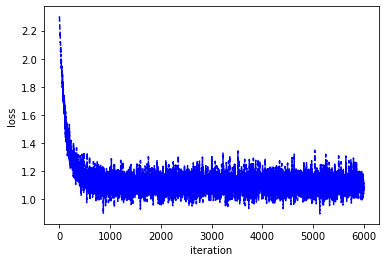

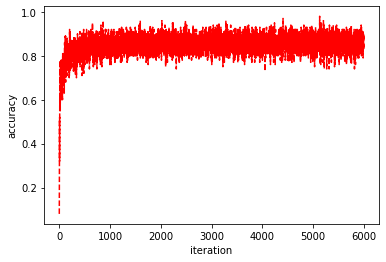

In [15]:
# training loss curve
plt.figure()
plt.plot(loss_set, 'b--')
plt.xlabel('iteration')
plt.ylabel('loss')
# training accuracy curve
plt.figure()
plt.plot(accu_set, 'r--')
plt.xlabel('iteration')
plt.ylabel('accuracy');

### You have finished homework2-softmax, congratulations!